In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/customer_purchase_data.csv')

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

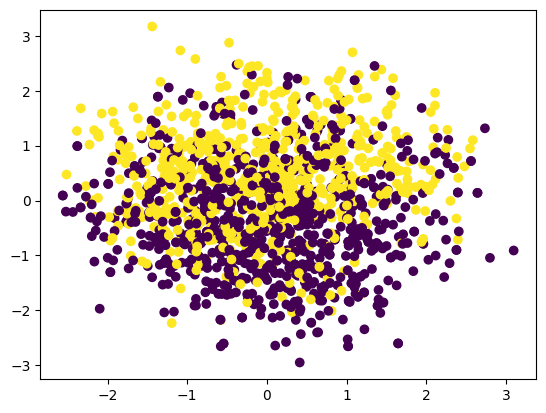

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_pca, y, epochs=500, validation_split = 0.2,verbose=1,callbacks=[early_stopping])

Epoch 1/500
38/38 [==============================] - 1s 8ms/step - loss: 0.6241 - accuracy: 0.6567 - val_loss: 0.6234 - val_accuracy: 0.6633
Epoch 2/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.6650 - val_loss: 0.6258 - val_accuracy: 0.6633
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.6700 - val_loss: 0.6222 - val_accuracy: 0.6733
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.6625 - val_loss: 0.6329 - val_accuracy: 0.6567
Epoch 5/500
38/38 [==============================] - 0s 4ms/step - loss: 0.6072 - accuracy: 0.6708 - val_loss: 0.6218 - val_accuracy: 0.6567
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.6650 - val_loss: 0.6242 - val_accuracy: 0.6667
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.6600 - val_loss: 0.6246 - val_accuracy: 0.6667
Epoch 8/500
3

9600/9600 [==============================] - 13s 1ms/step


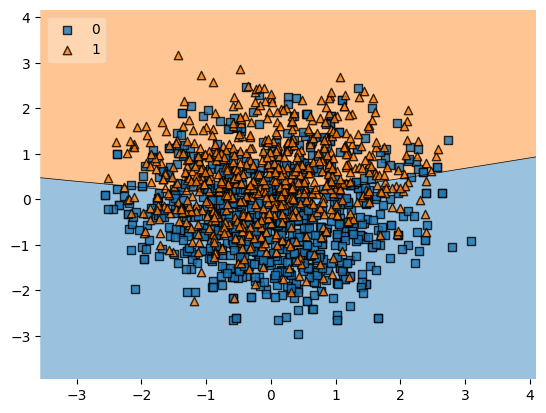

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_pca, y.astype('int'), clf=model, legend=2)
# plt.xlim(-0.7,0.5)
# plt.ylim(-0.8,0.8)
plt.show()

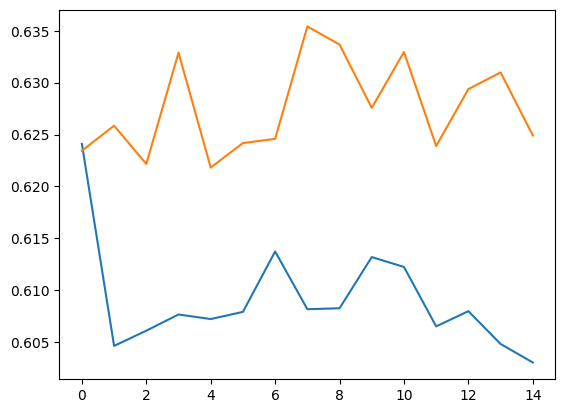

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

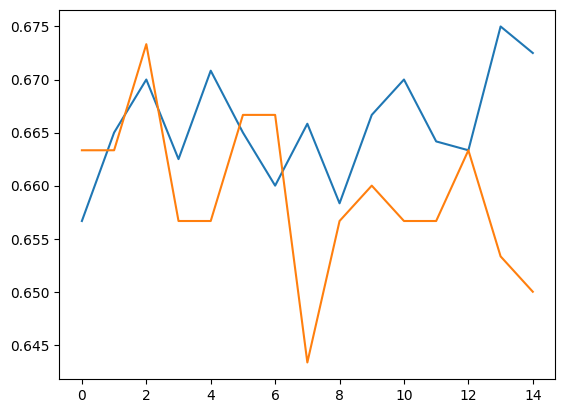

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
model_1 = Sequential()

model_1.add(Dense(128, input_dim=2, activation="relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dropout(0.6))
model_1.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_dropout = model_1.fit(X_pca, y, epochs=500, validation_split = 0.2,verbose=1,callbacks=[early_stopping])

Epoch 1/500
38/38 [==============================] - 1s 7ms/step - loss: 0.6405 - accuracy: 0.6267 - val_loss: 0.6452 - val_accuracy: 0.6367
Epoch 2/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6583 - val_loss: 0.6243 - val_accuracy: 0.6433
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6558 - val_loss: 0.6293 - val_accuracy: 0.6567
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6608 - val_loss: 0.6232 - val_accuracy: 0.6533
Epoch 5/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.6600 - val_loss: 0.6223 - val_accuracy: 0.6667
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6558 - val_loss: 0.6260 - val_accuracy: 0.6567
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6500 - val_loss: 0.6291 - val_accuracy: 0.6533
Epoch 8/500
3

9600/9600 [==============================] - 13s 1ms/step


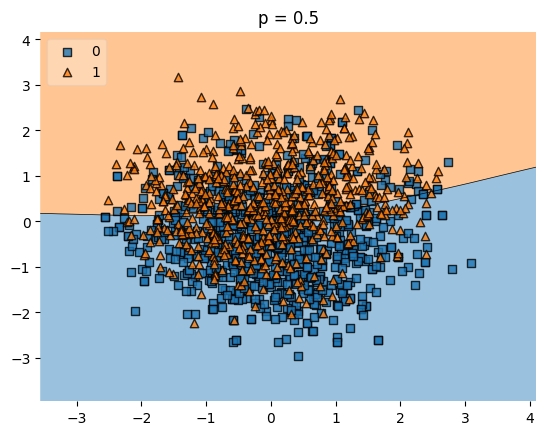

In [21]:
plot_decision_regions(X_pca, y.astype('int'), clf=model_1, legend=2)
# plt.xlim(-0.7,0.5)
# plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

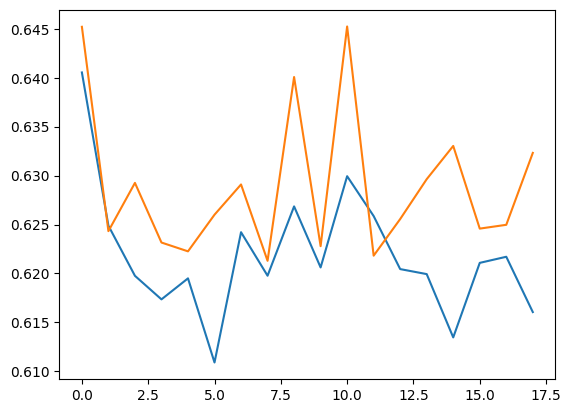

In [22]:
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])

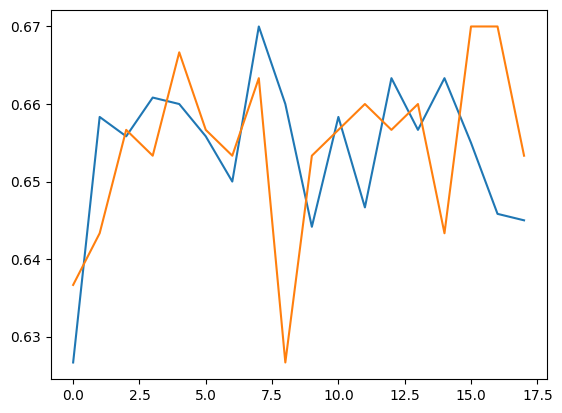

In [23]:
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])